# Python ML Classification Project Loan status classification Naive Bayes

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part-1: Data Exploration and Pre-processing

## 1) load the given dataset

In [71]:
cd D:\Data Science\Project\P8

D:\Data Science\Project\P8


In [72]:
df=pd.read_csv("Python_Project_7_Nai.csv")
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


## 2) check the null values

In [74]:
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

## 3) print the column names

In [75]:
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

## 4) create list for all the columns which have null values columns

In [76]:
columns_list=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
columns_list

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

## 5) fill all the null values with mean using for loops

In [77]:
for i in columns_list:
    df[i]=df[i].fillna(df[i].mean())

In [78]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,Not Default


In [79]:
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

## 6) get data information

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


## 7) describe dataset

In [81]:
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


## 8) display box plot for LIMIT_BAL 

{'whiskers': [<matplotlib.lines.Line2D at 0x23ed0e352e0>,
 'caps': [<matplotlib.lines.Line2D at 0x23ed0e359a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ed0e2bf40>],
 'medians': [<matplotlib.lines.Line2D at 0x23ed0e3f0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ed0e3f400>],
 'means': []}

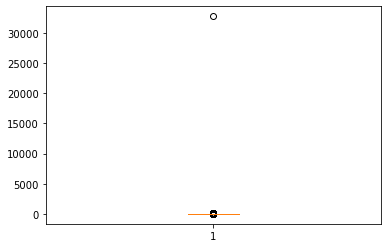

In [82]:
plt.boxplot(df['LIMIT_BAL'])

## 9) display box plot for age

{'whiskers': [<matplotlib.lines.Line2D at 0x23ed0387160>,
 'caps': [<matplotlib.lines.Line2D at 0x23ed0321ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23ed0e221c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23ed031c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x23ed031c550>],
 'means': []}

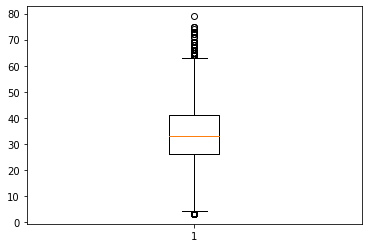

In [83]:
plt.boxplot(df['AGE'])

## 10) drop all the null values

In [84]:
df=df.dropna()

## 11) perform encoding on default status

In [85]:
df['Default Status'].unique()

array(['Default', 'Not Default'], dtype=object)

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
labencode=LabelEncoder()

In [88]:
df['Default Status']=labencode.fit_transform(df['Default Status'])

# Part-2: Working with Models

## 1) Create a features and target dataset

In [93]:
fd=df.drop(['ID','Default Status'],axis=1)
fd.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576
1,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000
2,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000
3,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000
4,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000


In [98]:
td=df['Default Status']
td.head()

0    0
1    0
2    1
3    1
4    1
Name: Default Status, dtype: int32

## 2) Split data into training and testing

In [95]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(fd,td,test_size=0.20,random_state=42)

## 3) Fit the Gaussian naive bayes classifier

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
std_scaler=StandardScaler()

In [110]:
fd=std_scaler.fit_transform(fd)

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
nvi_model= GaussianNB()

In [121]:
nvi_model.fit(x_train,y_train)

GaussianNB()

## 4) Print the training and

In [122]:
nvi_model.score(x_train,y_train)

0.7496666666666667

## 5) Print the testing score

In [123]:
nvi_model.score(x_test,y_test)

0.7513333333333333

## 6) Find the accuracy score,

In [129]:
y_prd=nvi_model.predict(x_test)
y_prd

array([1, 1, 1, ..., 1, 1, 0])

In [126]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [132]:
accuracy=accuracy_score(y_test,y_prd)
print("Accuracy_Score:",accuracy)

Accuracy_Score: 0.7513333333333333


## 7) Find the precision score,

In [133]:
print("Precision_Score",precision_score(y_test,y_prd))

Precision_Score 0.7789418543740179


## 8) Find the recall score

In [134]:
print("Recall_Score:",recall_score(y_test,y_prd))

Recall_Score: 0.951781523362492


In [138]:
print("F1_score:",f1_score(y_test,y_prd))

F1_score: 0.8567313232187441


## 9) Find the Confusion matrix

In [136]:
print("Confusion Matrix:","\n",confusion_matrix(y_test,y_prd))

Confusion Matrix: 
 [[  47 1266]
 [ 226 4461]]


## 10) Find the Classification report

In [137]:
print("Classification_Report:","\n",classification_report(y_test,y_prd))


Classification_Report: 
               precision    recall  f1-score   support

           0       0.17      0.04      0.06      1313
           1       0.78      0.95      0.86      4687

    accuracy                           0.75      6000
   macro avg       0.48      0.49      0.46      6000
weighted avg       0.65      0.75      0.68      6000

